In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_classification
%matplotlib inline

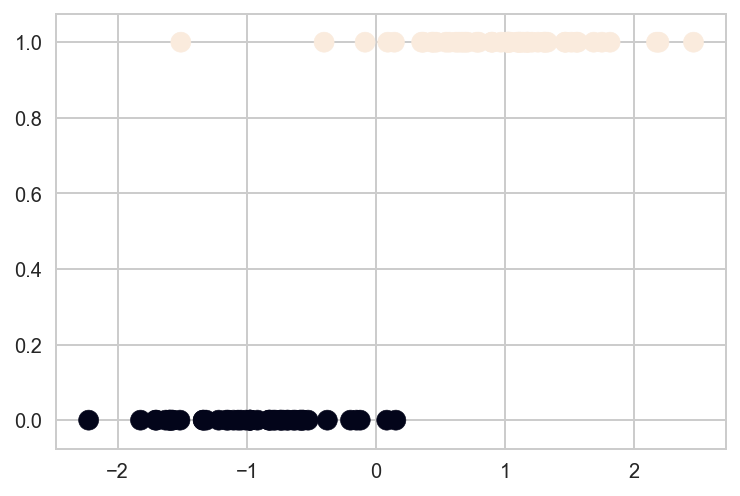

In [5]:
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y, s=100)
plt.show()

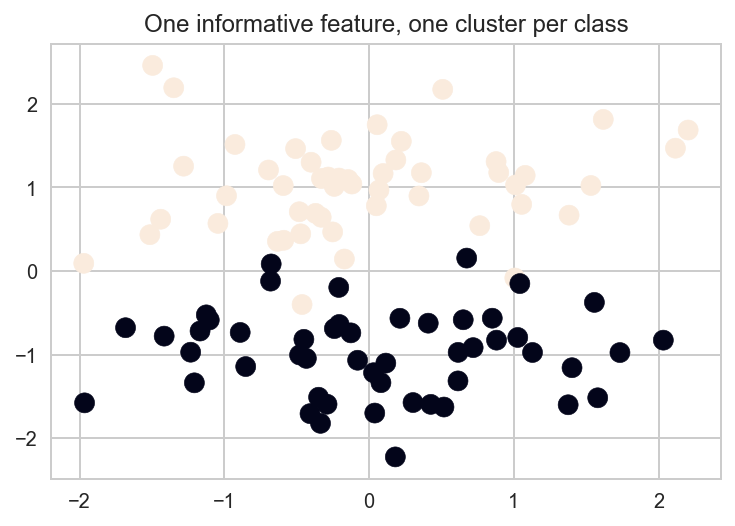

In [7]:
plt.title("One informative feature, one cluster per class")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100)
plt.show()

n_informative = 1 , 하나의 독립변수만 y에 영향을 준다는 뜻

한 클래스가 하나의 클러스터로 묶여있을때

한 클래스당 두개의 클러스터로 묶여있을때

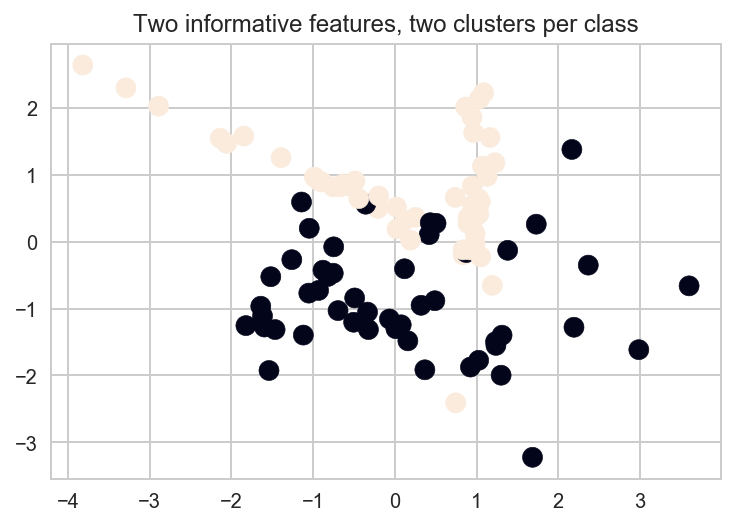

In [8]:
plt.title("Two informative features, two clusters per class")
X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=100)
plt.show()

multi-class, two informative features, one cluster

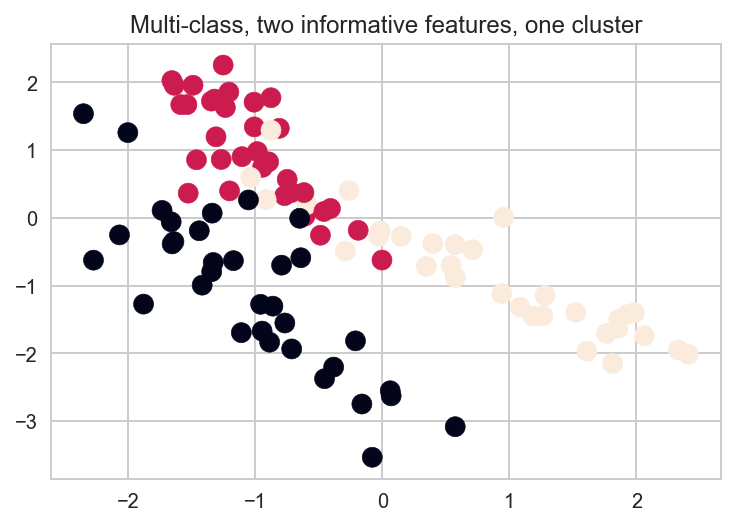

In [9]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

make_blobs 함수
 - class를 묶어서 클러스터의 갯수를 조절할 수 있다

In [10]:
from sklearn.datasets import make_blobs

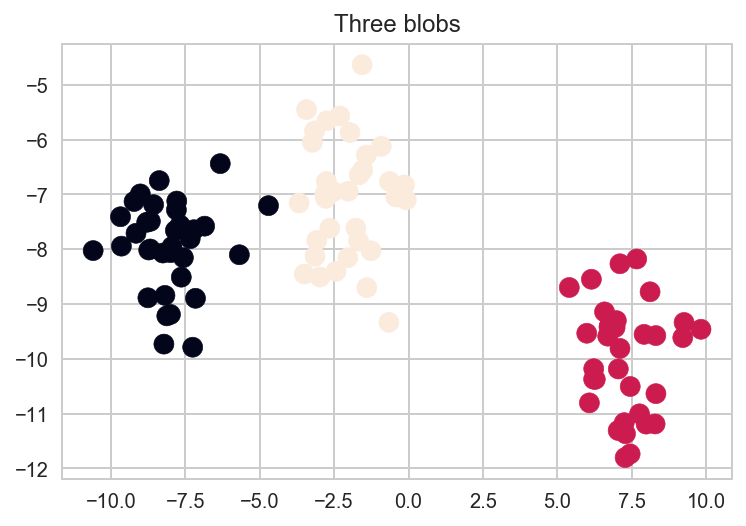

In [11]:
plt.title("Three blobs")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:,1], marker='o', c=Y1, s=100)
plt.show()

# Scikit-Learn의 전처리 기능

## 스케일링
 - robust_scale(X) : 미디언 값을 사용하면 아웃라이어가 있어도 평균값이 많이 이동하지 않는다. IQR의 경우에도 마찬가지다. -> 아웃라이어의 영향을 최소화하여 스케일링

In [12]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [13]:
x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


실제로는 위에 4가지는 잘 쓰지 않고 scaler클래스를 사용한다
 - 함수를 사용할 경우 fitting까진 가능하지만 prediction이 불가능하다. 왜냐면 train데이터셋과 test데이터셋의 평균과 표준편차가 다르므로 스케일 값이 다르게 나온다.
 - test 데이터를 예측할때 transfrom만 한번 더 해주면 된다.

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

# 정규화
 - 많이 쓰이지는 않는다


# 인코딩
 - n_values
 - n_features

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [25]:
X = np.array([[0],[1],[2]])
X

array([[0],
       [1],
       [2]])

In [26]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3], dtype=int32), array([0, 1, 2], dtype=int64))

In [27]:
ohe.transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
X = np.array([[0,0,4], [1,1,0], [0,2,1], [1,0,2]])
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [29]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 0., 4.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 2.]])

## Imputer
 - missing_value를 채워줄 때

## PolynomialFeatures

## Function Transformer

## Label Binarizer
 - Y값을 encoding 할 때 쓰는 것들
 - OnehotEncoder랑 비슷
 - 역변환이 가능하다.

## Label Encoding
 - 더미변수가 아니라 0 ~ k - 1까지의 정수로 변환

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
le.classes_

array([1, 2, 6])

## Binarizer

# 분류의 기초

- decision 혹은 discriminant function(함수)를 이용해 경계선을 만들고 그것을 기준으로 classfy
- 확률론적 방법 : probabilistic - 1.generative(likelihood를 먼저 만들고 조건부확률을 계산하는 방법) 2. discriminative(조건부 확률을 바로 뽑아내는 것)

## 확률론적 방법

### 조건부 확률 방법
 - y값에 대한 확률이 있어야 한다.
 - 입력값은 조건이 되는 것들 (test 값에 뭘 넣느냐에 따라 y값의 확률이 바뀐다)
 - 제일 값이 큰 그 class 값이 답이다
 - 확률론적 방법에는 predict_proba라는 메서드를 사용 ( P1, P2 ... Pk 를 골라준다)
 - predict_log_proba log취한 값을 알려주는 메서드를 사용
 - 클래스 갯수에 영향을 받지 않는다. (QDA와 나이브베이즈 모형은 생선론적 방법)

### QDA

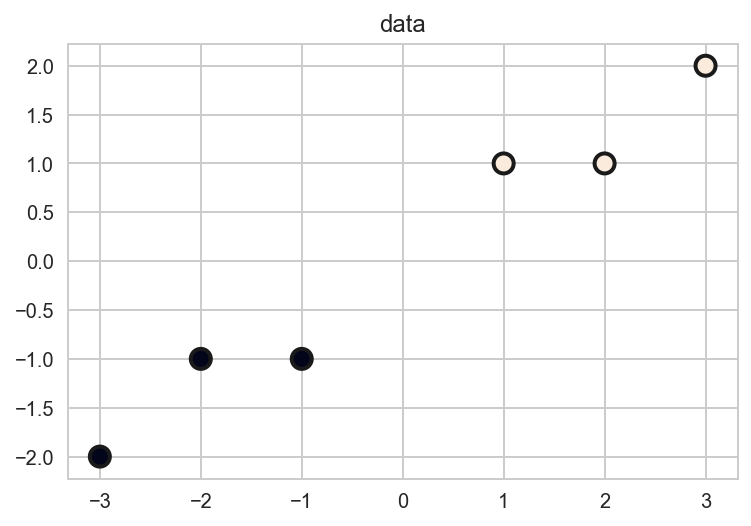

In [33]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.title("data")
plt.show()

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y) # 자기자신 return

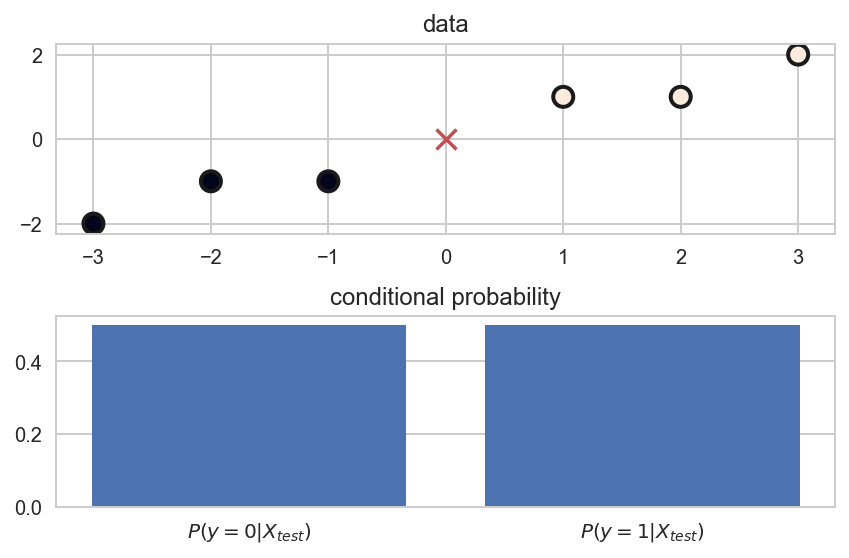

In [39]:
x = [[0,0]]
p = model.predict_proba(x)[0] # 0일 확률과 1일 확률을 구한다.
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolors='k', linewidths=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolors='k', marker='x', linewidths=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

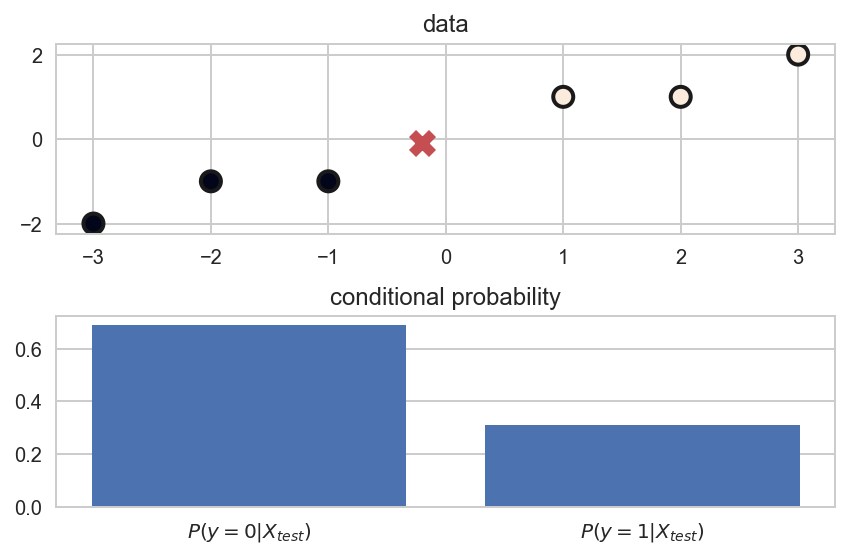

In [41]:
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

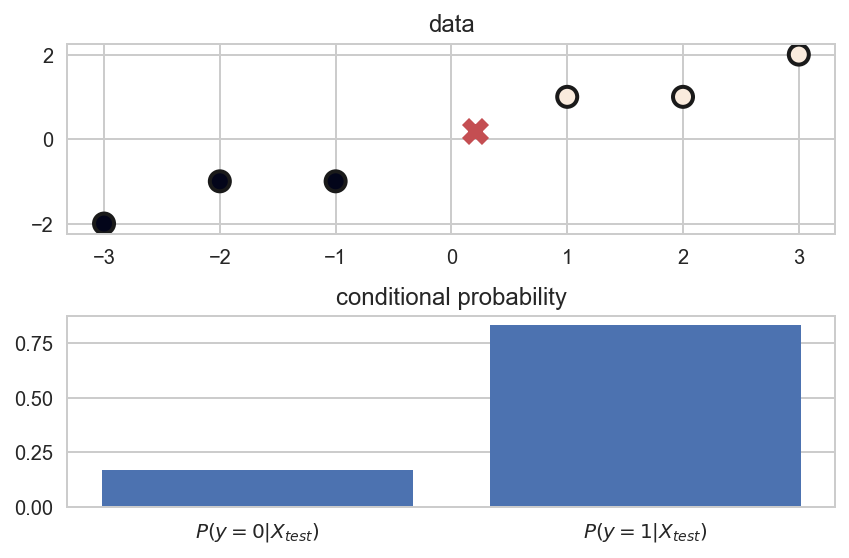

In [42]:
x = [[0.2, 0.2]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

### 나이브 베이지안 모형

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB()),
])
model.fit(news.data, news.target)

n = 1
x = news.data[n:n+1]
y = model.predict(x)[0]
print(x[0])
print("=" * 80)
print("Actual Category:", news.target_names[news.target[n]])
print("Predicted Category:", news.target_names[y])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

Actual Category: comp.sys.ibm.pc.har

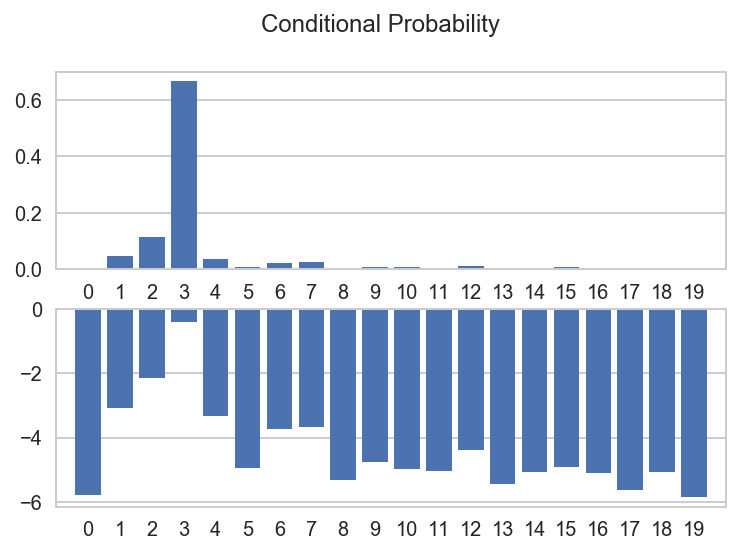

In [3]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.suptitle("Conditional Probability")
plt.show()

### 로지스틱 회귀 모형
 - likelihood 없이 바로 P(y|x) = f(x) 가 함수라는 가정으로 함수를 바로 찾아낸다.
 - discriminative 모형
 - x가 빨간색 x일때 y가1일 확률은 파란색 함수의 높이다

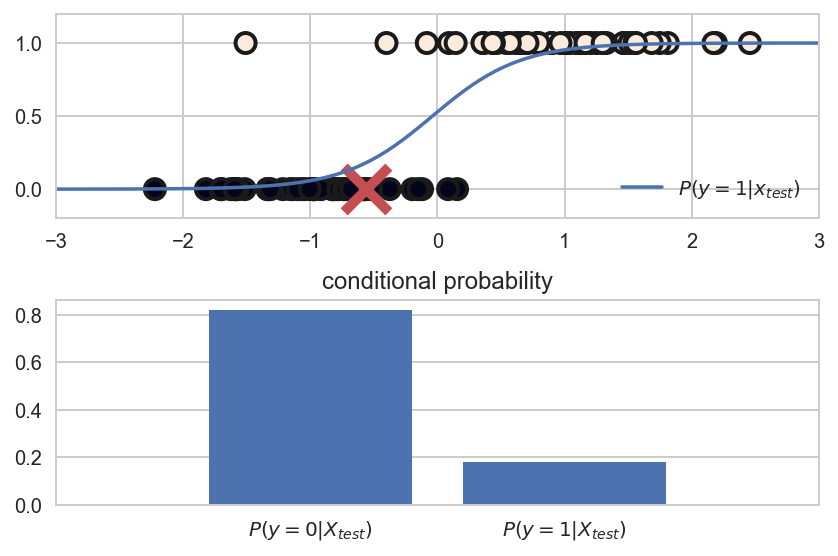

In [7]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(X0[0], model.predict(X0[:1]), marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[:1])[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("conditional probability")
plt.tight_layout()
plt.show()

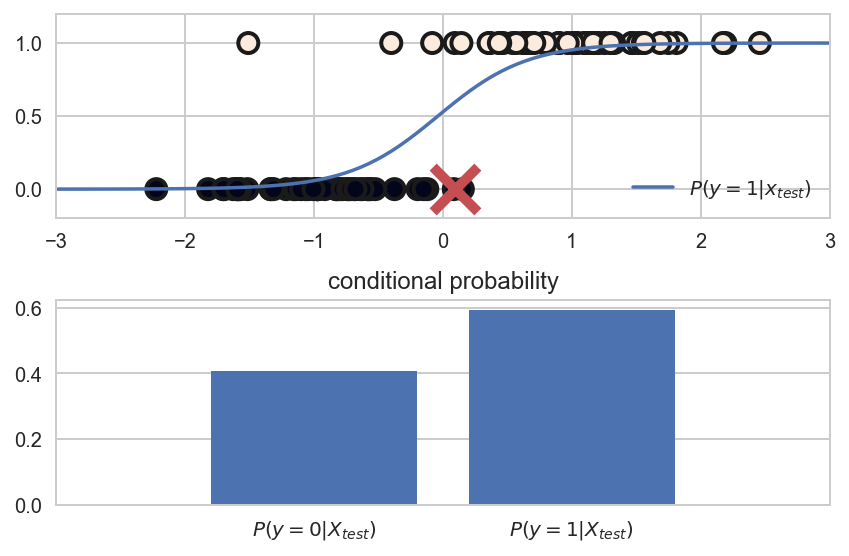

In [98]:
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(X0[6], model.predict(X0[:1]), marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[6:])[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("conditional probability")
plt.tight_layout()
plt.show()

## 판별 함수 기반 모형(discriminant function)

### 퍼셉트론

### 커널 SVM
 - 복잡한 형태의 경계선을 생성
 - 하이퍼 파라미터를 잘 설정 해줘야 한다.

# 다중 클래스 분류
 - 전에 본 판별함수들은 binary classification 밖에 할 수 없다.

## OVO
 - 1대1로 다 붙어보는 것
 - 클래스 수가 많아지면 치뤄야하는 경기의 수가 제곱으로 늘어난다.
 - 그래서 OVR을 쓴다

## OVR
 - 1번과 2번 혹은 3번을 붙임.
 - 2번이냐 1번 혹은 3번이냐
 - 3번이냐 3번이 아니냐
 - 클래스가 k가 있으면 k번만 문제를 풀면 된다. (풀어야할 문제의 수가 확 줄어든다)
 1 1 0 0 
 2 0 1 0
 1 1 0 0
 3 0 0 1
 1 1 0 0
 2 0 1 0
 - 내부적으로는 승점 방식이 아니라 soft 방식으로 decision function 값을 바로 갖는다
 

# 분류 성능 평가
 - sklearn.metrics의 서브 패키지

## Confusion Matrix
 - 대각행렬이 나와야 좋은 모델이다.

In [113]:
from sklearn.metrics import confusion_matrix

## Binary Confusion Matrix
 - 대각은 True 비대각은 False
 - 첫번째 열은 Positive 두번째 열은 Negative
 - 실제로 Positive 일때 Positive라고 예측했으면 True Positive, 
 - 실제로 Positive 일때 Negative라고 예측했으면 False Negative
 - 병을 진단할 때
 - 공장에서 물건의 불량 여부를 따질 때 (불량이 Positive, 정상이 Negative)

## FDS의 예
 - 사기거래를 찾아내는 시스템
 - 사기거래를 Positive로

## 평가 스코어
 - 스칼라 값으로 스코어를 뽑아내기 위함

### Accuracy 정확도
 - 가장 일반적
 - 전체 샘플 대비 맞게 예측한 샘플의 수
 - 맞게 예측한 것들(대각선에 있는 것들) / 전체

### Precision 정밀도
 - 사람이 원하는 척도를 반영하지 못하는 경우가 있다
 - TP / TP + FP
 - 사기거래라고 판단한 거래 중 실제 사기 거래의 비율

### Recall 재현율
 - TPR : true positive rate
 - 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율
 - recall = TP / TP + FN

### Fall-Out 위양성율
 - FPR : false positive rate
 - 실제 정상 거래 중에서 FDS가 사기 거래라고 예측한 거래의 비율
 - FP / FP + TN
 - 높으면 나쁜 것
 - specificity = 1 - fall-out

### F (beta) score
 - precision이 높아지면 실제 범죄자를 못 잡는 경우가 있을 수 있다. (recall은 낮아짐)
 - recall rate을 높이려면 의심가는 것은 무조건 잡아 들이면 된다 (precision은 낮아짐)
 - precision과 recall은 반비례하는 경우가 많다
 - 둘의 평균을 낸 것이 F score
 - 그냥 평균이 아닌 조화 평균을 낸다. (역수를 취해서 평균을 내고 다시 역수를 취한 것)
 - 2ab / a+b
 - a와 b에 대한 가중치(beta score)를 줄 수 있다
 - beta가 1이면 precision과 recall 을 동등하게 따지는 것.
 - classification report 중 support : 실제로 그 클래스에 속한 것의 갯수

## ROC 커브
 - fall-out과 recall의 변화를 시각화한 것
 - 모든 score가 똑같아도 성격이 다른 것이 있을 수 있다 -> 이걸 알아보기 위한 것이 ROC 커브다
 - 가상의 상황까지 고려
 - 상황에 따라 중요하게 생각되는 rate이 달라 진다.
 - 보통 recall과 fall-out은 비례한다.
 - recall rate과 fall-out이 완전히 같은 모델은 쓸모 없는 모델이다.(ROC커브의 검은점선)
 - fall-out과 recall이 100이면 범인은 모두 잡지만 무고한 사람도 같이 다 잡힌다
 - kernel SVM이 더 좋은 모델이다

In [115]:
X, y = make_classification(n_samples=1000, weights=[0.99, 0.01],
                           class_sep=0.5, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.15).fit(X, y)
y_hat2 = model2.predict(X)

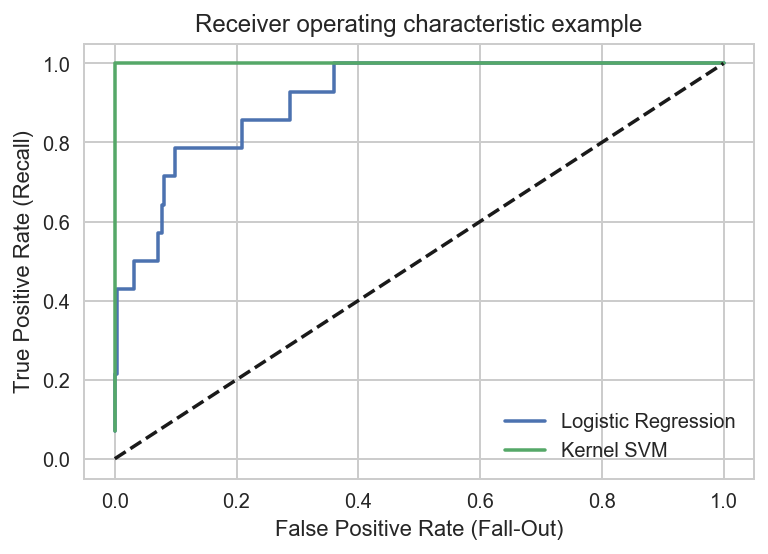

In [116]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))


plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

## AUC (Area Under the Curve)
 - ROC커브의 면적
 - 0.5가 제일 쓰레기 모델
 - 면적이 클수록 좋은 모델